Description des données :
Les données sont constituées suivant 4 datasets distincts :
X_train_update.csv »: échantillons d'entraînement comprenant: la désignation, la description, le productid et l'imageid
y_train_CVw08PX.csv : variable cible (prdtypecode)
X_test_update.csv : échantillons de test comprenant: la désignation, la description, le productid et l'imageid productid et imageid sont associées aux images
images.zip : contient 2 dossiers
            image_train : 84 916 images
            image_test : 13 812 images

# Exploration des dataframes

In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')

X_train = pd.read_csv('/mnt/c/Users/steph/OneDrive/Images/Rakuten/X_train_update.csv', index_col=0) 
X_test = pd.read_csv('/mnt/c/Users/steph/OneDrive/Images/Rakuten/X_test_update.csv', index_col=0) 
Y_train = pd.read_csv('/mnt/c/Users/steph/OneDrive/Images/Rakuten/Y_train_CVw08PX.csv',index_col=0) 

2023-11-07 10:23:45.423319: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-07 10:23:45.425233: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 10:23:45.465562: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 10:23:45.466846: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-07 10:23:46.432894: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
X_train.head()


,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


In [3]:
X_train.info()

print('shape X_train:', X_train.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB
shape X_train: (84916, 4)


In [4]:
X_test.head()


,designation,description,productid,imageid
84916,Folkmanis Puppets - 2732 - Marionnette Et Théâ...,NaN,516376098,1019294171
84917,Porte Flamme Gaxix - Flamebringer Gaxix - 136/...,NaN,133389013,1274228667
84918,Pompe de filtration Speck Badu 95,NaN,4128438366,1295960357
84919,Robot de piscine électrique,<p>Ce robot de piscine d&#39;un design innovan...,3929899732,1265224052
84920,Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X...,NaN,152993898,940543690


In [5]:
X_test.info()

print('shape X_test:', X_test.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 13812 entries, 84916 to 98727
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  13812 non-null  object
 1   description  8926 non-null   object
 2   productid    13812 non-null  int64 
 3   imageid      13812 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 539.5+ KB
shape X_test: (13812, 4)


In [6]:
Y_train.head()


,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


In [7]:
Y_train.info()

print('shape Y_train:', Y_train.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   prdtypecode  84916 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB
shape Y_train: (84916, 1)


Comptage du nombre de NaN dans X_train et Y_train

In [8]:
counts_nan = X_train.isnull().sum().sort_values(ascending=False)
print('X_train: \n', counts_nan[counts_nan > 0])

counts_nan = X_test.isnull().sum().sort_values(ascending=False)
print(' \n X_test: \n',counts_nan[counts_nan > 0])

X_train: 
 description    29800
dtype: int64
 
 X_test: 
 description    4886
dtype: int64


Remplacement des NaN par une chaînes de caractères vide dans X_train et X_test

In [9]:
X_train['description'].fillna('', inplace=True)
X_test['description'].fillna('', inplace=True)

Pourcentage de la distribution des classes

In [10]:
# Comptage des valeurs uniques de "prdtypecode" pour chaque classe
unique, counts = np.unique(Y_train["prdtypecode"], return_counts=True)
print(dict(zip(unique, counts)))

# Comptage du nombre total de classes uniques
nombre_total_classes = Y_train["prdtypecode"].nunique()
print("Nombre total de classes uniques :", nombre_total_classes)


{10: 3116, 40: 2508, 50: 1681, 60: 832, 1140: 2671, 1160: 3953, 1180: 764, 1280: 4870, 1281: 2070, 1300: 5045, 1301: 807, 1302: 2491, 1320: 3241, 1560: 5073, 1920: 4303, 1940: 803, 2060: 4993, 2220: 824, 2280: 4760, 2403: 4774, 2462: 1421, 2522: 4989, 2582: 2589, 2583: 10209, 2585: 2496, 2705: 2761, 2905: 872}
Nombre total de classes uniques : 27


In [11]:
# Calcul du pourcentage de chaque code produit
print(Y_train["prdtypecode"].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

prdtypecode
2583    12.02%
1560     5.97%
1300     5.94%
2060     5.88%
2522     5.88%
1280     5.74%
2403     5.62%
2280     5.61%
1920     5.07%
1160     4.66%
1320     3.82%
10       3.67%
2705     3.25%
1140     3.15%
2582     3.05%
40       2.95%
2585     2.94%
1302     2.93%
1281     2.44%
50       1.98%
2462     1.67%
2905     1.03%
60       0.98%
2220     0.97%
1301     0.95%
1940     0.95%
1180      0.9%
Name: proportion, dtype: object


Données sur les images avec un nouveau dataframe 

In [12]:
# Ajout du nom de l'image à X_train
X_train["image_name"] =  "image_" + X_train.imageid.astype(str)+ "_product_" + X_train.productid.astype(str)+ ".jpg" 

# Concaténation de X_train et de Y_train['prdtypecode'] 
X_train_bis = pd.concat([X_train, Y_train['prdtypecode']], axis = 1)

X_train_bis.head()

,designation,description,productid,imageid,image_name,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,,3804725264,1263597046,image_1263597046_product_3804725264.jpg,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,,436067568,1008141237,image_1008141237_product_436067568.jpg,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,image_938777978_product_201115110.jpg,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,,50418756,457047496,image_457047496_product_50418756.jpg,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,image_1077757786_product_278535884.jpg,2705


In [13]:
# Enregistrement du dataframe X_train_bis
path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/X_train_bis.csv'
X_train_bis.to_csv(path, index=False)

In [14]:
# Chargement d'une image 
image_path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/images/image_train/image_234234_product_184251.jpg'
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image)

print("Shape de l'image :", image.shape)
# Les dimensions de toutes les images sont identiques : (500, 500, 3)

Shape de l'image : (500, 500, 3)


2023-11-07 10:24:31.752120: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-07 10:24:31.786375: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Recherche des mots les plus fréquents de chaque classe

In [15]:
# Définition des stopwords en français, anglais, et allemand, ainsi que des mots à exclure
stop_words = stopwords.words('french') + stopwords.words('english') + stopwords.words('german') + \
            ['plus', 'peut', 'tout', 'etre', 'sans', 'dont', 'aussi', 'comme', 'meme', \
             'bien', 'leurs', 'elles', 'cette', 'celui', 'ainsi', 'encore', 'alors', 'toujours', \
             'toute', 'deux', 'nouveau', 'peu', 'car', 'autre', 'jusqu', 'quand', 'ici', 'ceux', \
             'enfin', 'jamais', 'autant', 'tant', 'avoir', 'moin', 'celle', 'tous', 'contre', \
             'pourtant', 'quelque', 'toutes', 'surtout', 'cet', 'comment', 'rien', 'avant', 'doit', \
             'autre', 'depuis', 'moins', 'tre', 'souvent', 'etait', 'pouvoir', 'apre', 'non', 'ver', 'quel', \
             'pourquoi', 'certain', 'fait', 'faire', 'donc', 'trop', 'quelques', 'parfois', 'tres', 'donc',\
             'dire', 'eacute', 'egrave', 'rsquo', 'agrave', 'ecirc', 'nbsp', 'acirc', 'apres', 'autres', 'ocirc',\
             'entre', 'sous', 'quelle', '-', '.', ':', '<', 'N°', 'Du', 'La', 'de', '>', '/', ';', '&', '#', 'Lot', \
             'b', 'br/', '/b', 'br', 'p', '/p', 'b', '/b', ']', '[', 'yu-gi-oh', 'vf', \
             'fr', 'rc', 'x', '%', 'br', 'cm', 'x', 'p', 'g', 'm.', '<', '>', '/', '/strong', '/ul', \
             '/p', 'div', '/div', '(', '+', '(', ')', 'li', '/li']

# Création d'un dictionnaire vide pour stocker les principaux noms par classe
main_nouns_by_class = {}

# regroupement des données par classe 'prdtypecode'
grouped_data = X_train_bis.groupby('prdtypecode')

# Parcours chaque groupe de données
for class_code, group in grouped_data:
    # Combine les textes de 'designation' et 'description' pour chaque groupe
    combined_text = ' '.join(group['designation'].fillna('') + ' ' + group['description'].fillna(''))
    
    # Tokenization du texte en mots
    words = word_tokenize(combined_text.lower())  # Assurez-vous de convertir en minuscules
    
    # Filtrage des noms 
    nouns = [word for (word, pos) in nltk.pos_tag(words) if pos.startswith('N') and word not in stop_words]
    
    # Création fréquence pour les noms
    freq_dist = FreqDist(nouns)
    
    # Sélection des noms par fréquence décroissante
    sorted_nouns = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)
    
    # Noms les plus fréquents 
    top_nouns = [noun for noun, freq in sorted_nouns[:10]] 
    
    # Principaux noms par classe dans le dictionnaire
    main_nouns_by_class[class_code] = top_nouns

# Affichage des principaux noms par classe
for class_code, nouns in main_nouns_by_class.items():
    print(f"Classe {class_code}: {', '.join(nouns)}")



Classe 10: edition, livre, édition, gt, occasion, vendons, partenaires, donnons, organisations, guide
Classe 40: import, produit, jeu, comprend, contrôleur, description, pc, fiche, si, attention
Classe 50: jeu, charge, protection, ps4, console, manette, produit, contrôleur, boutons, jeux
Classe 60: console, couleur, game, jeu, marque, affichage, paquet, tactile, taille, communication
Classe 1140: figurine, pop, star, taille, wars, collection, figurines, licence, pvc, env
Classe 1160: carte, magic, commune, pokémon, dragon, pv, pokemon, reverse, ball, r
Classe 1180: masque, warhammer, jeu, figurine, prince, dragons, visage, halloween, différence, couleur
Classe 1280: enfants, jouets, jouet, taille, bébé, couleur, cadeau, être, voiture, matériel
Classe 1281: enfants, jeu, jouets, jouet, game, bébé, cadeau, couleur, taille, cartes
Classe 1300: drone, batterie, dji, quadcopter, voiture, distance, caméra, poids, charge, protection
Classe 1301: bébé, chaussettes, taille, longueur, filles, ga

# Data_viz

Calcul séquence des mots

/home/workspace/API/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/workspace/API/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/workspace/API/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

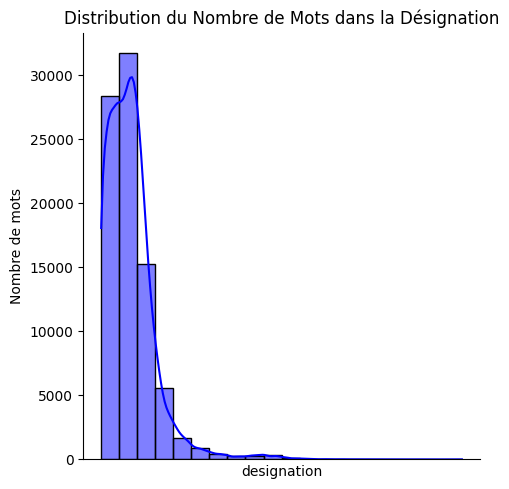

In [27]:
word_count = X_train['designation'].apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(12, 6))

# displot pour afficher la distribution des mots
sns.displot(word_count, kde=True, color='blue', bins=20)

# Supprimez les graduations de l'axe des x
plt.xticks([])

# Ajout des axes et un titre
plt.ylabel("Nombre de mots")
plt.title("Distribution du Nombre de Mots dans la Désignation")

# Affichage du graphique
plt.show()

Distribution des codes produits

/home/steph/workspace/rakuten_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/steph/workspace/rakuten_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/steph/workspace/rakuten_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


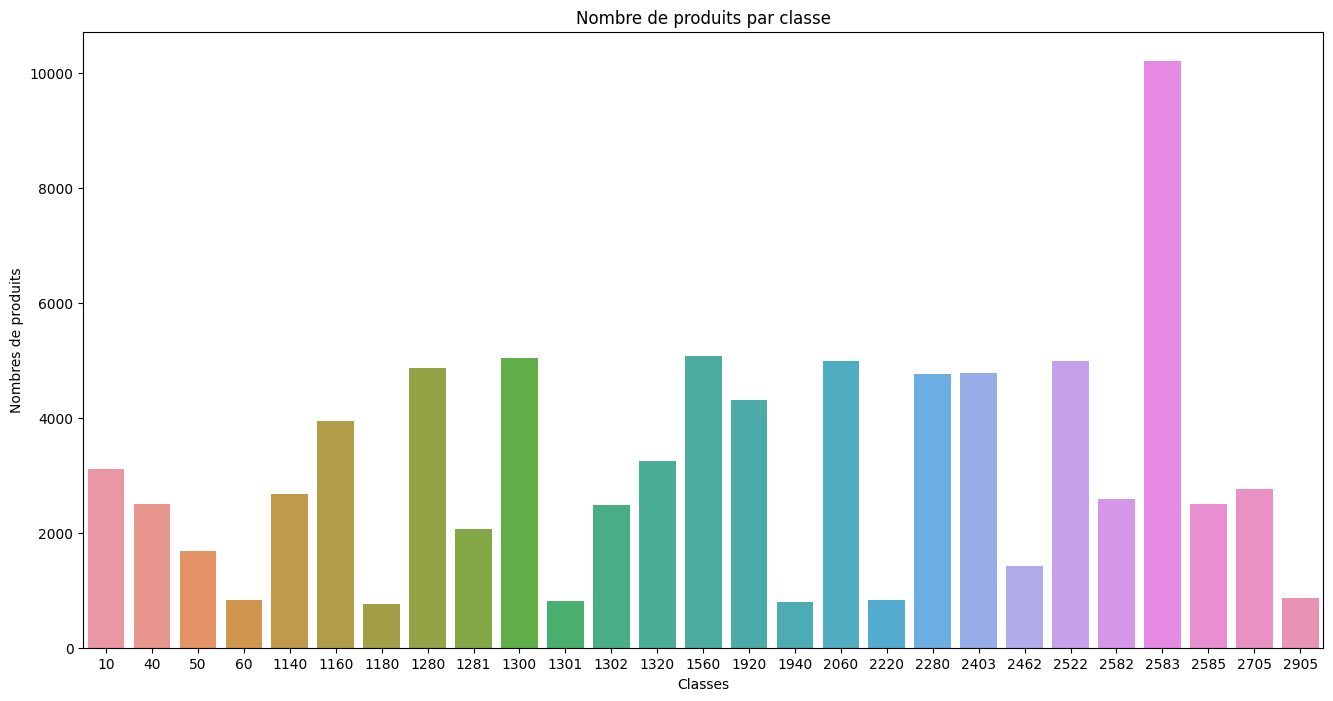

In [32]:
distr = Y_train.groupby('prdtypecode').size().sort_values().index[::-1]

plt.figure( figsize= (16, 8) )
sns.countplot(x= Y_train["prdtypecode"])
plt.title('Nombre de produits par classe')
plt.xlabel('Classes')
plt.ylabel('Nombres de produits')
plt.show()

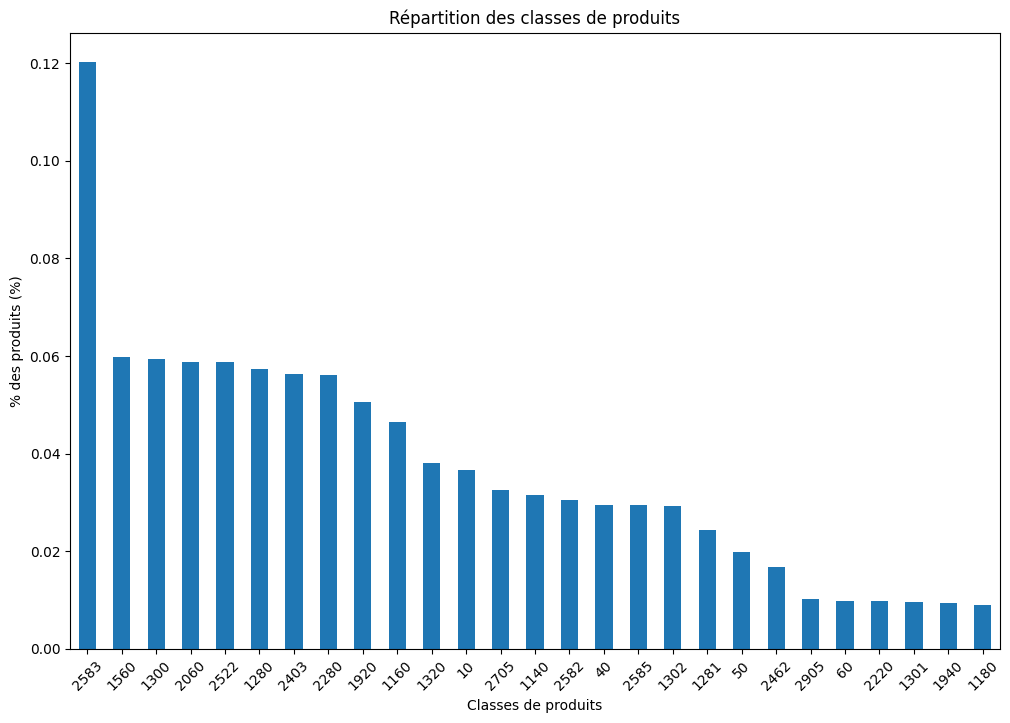

In [33]:
import matplotlib.pyplot as plt

typecodes = Y_train["prdtypecode"].value_counts(normalize=True)

plt.figure(figsize=(12, 8))
ax = typecodes.plot(kind='bar')
plt.title('Répartition des classes de produits')
plt.xlabel('Classes de produits')
plt.ylabel('% des produits (%)')  # Mettez à jour l'étiquette de l'axe y
plt.xticks(rotation=45)


plt.show()


Visualisation d'une image

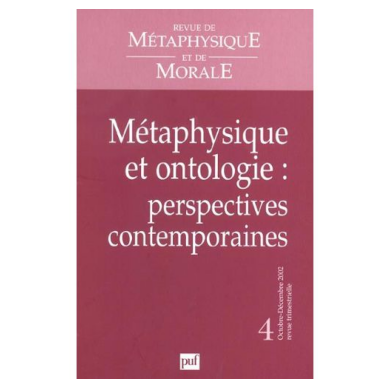

In [ ]:
im_path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/images/image_train/image_4678230_product_1244787.jpg'

import cv2
import matplotlib.pyplot as plt

# Chemin de l'image
im_path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/images/image_train/image_4678230_product_1244787.jpg'

# Charger l'image avec OpenCV
im = cv2.imread(im_path)

# Convertir l'image de BGR (format OpenCV) en RGB (format matplotlib)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Afficher l'image
plt.imshow(im_rgb)
plt.axis('off')  # Masquer les axes
plt.show()


Affichage de quelques images avec leurs noms

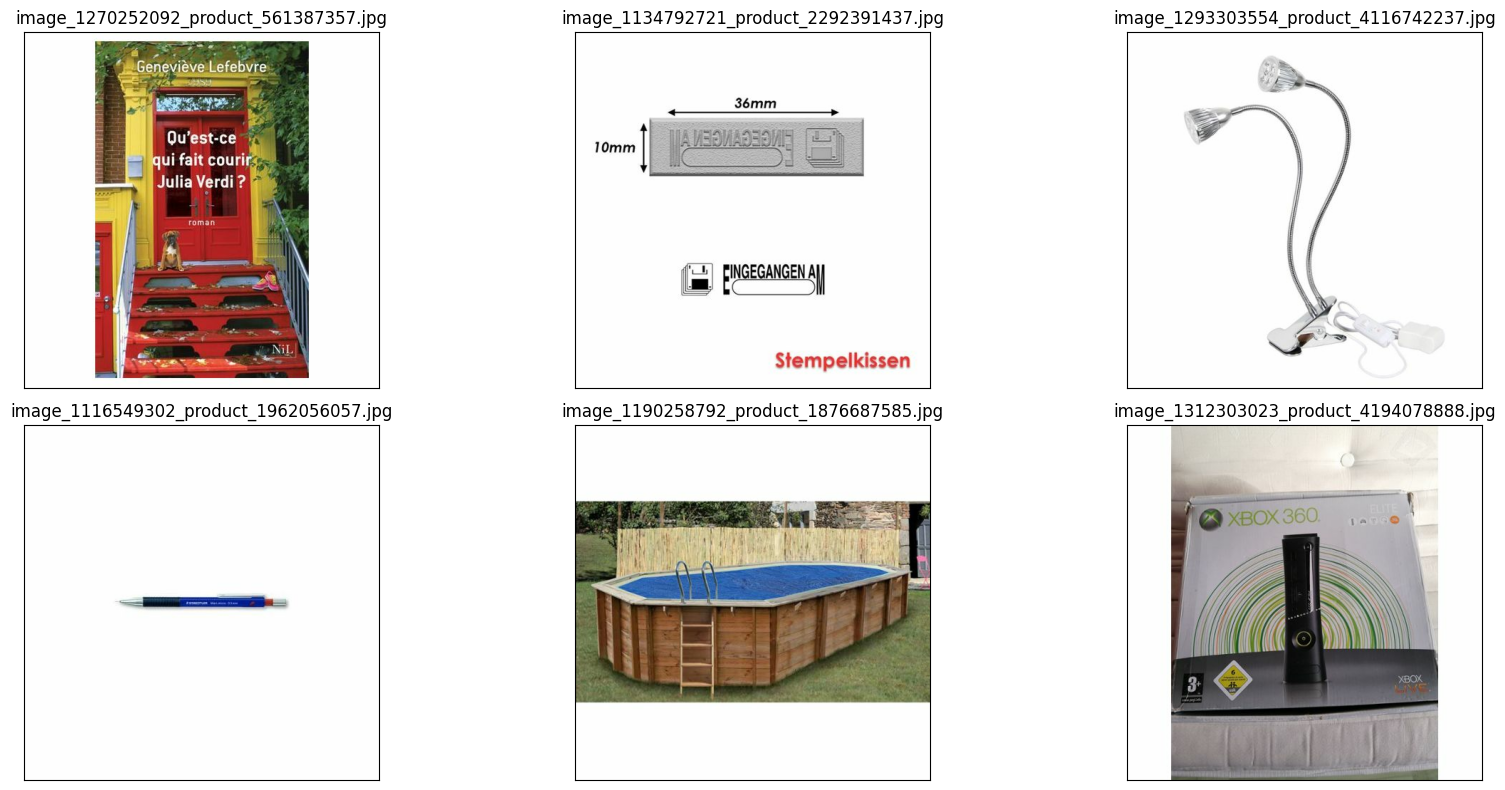

In [ ]:
import random

# Chemin de l'image
im_path = '/mnt/c/Users/steph/OneDrive/Images/Rakuten/images/image_train/'

# Nombre d'images à afficher
nb_img = 6

# Nombre de colonnes
col = 3

if nb_img % col == 0:
    rows = nb_img // col
else:
    rows = (nb_img // col) + 1


plt.figure(figsize=(18, 8))

# Sélection d'un échantillon aléatoire d'indices d'images
sample_indices = random.sample(range(len(X_train)), nb_img)

for i, idx in enumerate(sample_indices, 1):
    img = tf.io.read_file(im_path + X_train['image_name'][idx])
    img = tf.image.decode_jpeg(img, channels=3)

    plt.subplot(rows, col, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.title(str(X_train['image_name'][idx]))

plt.tight_layout()
plt.show()
